# Data visualization and Exploratory Data Analysis

In [2]:
import pandas as pd

pd.set_option('display.max_columns', None)

data = pd.read_csv(r"../data/owid-covid-data.csv")
df = data.sort_values('date', ascending=True)
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')

## To visualize some of the data and correlations, use, for example, a scatterplot

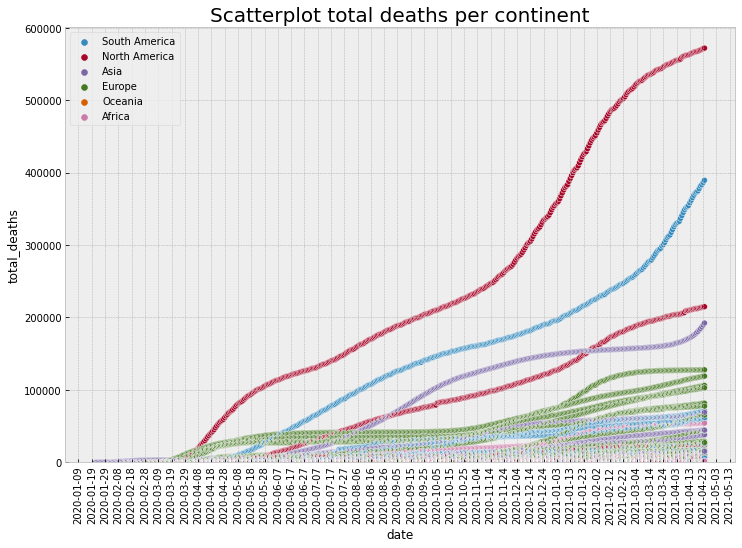

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.ticker as ticker

plt.style.use('bmh') # Set the style from a preset of styles

fig = plt.subplots(figsize=(12, 8)) # Create figure and set size

ax = sb.scatterplot(data=df, x='date', y='total_deaths', hue='continent') # Create a scatterplot total deaths by date per continent
ax.set_title('Scatterplot total deaths per continent', size=20); # Set title
ax.set_ylim(ymin=0) # Set starting value of y-axis to 0 - there are no negative deaths
ax.xaxis.set_major_locator(ticker.MultipleLocator(10)) # Set density of x-axis tickers

plt.legend(loc='upper left') # Show legend on the upper left size
plt.setp(ax.get_xticklabels(), rotation=90) # Rotate x-axis tickers 90degrees so that they are readible
print() # removes weird array output filled with 'None's

There's far too many countries to visualize them in a scatterplot explicitly. To increase the likehood of interesting findings and also data interpretability one might want to reduce the search space to a specific continent or even a specific country. Here we reduce the search to Europe for no particular reason besides the fact that that's where we exist. 

In [3]:
# Creating a new dataframe with the rows that correspond to European countries by selecting the continent

# To be able to do this, some indexing is necessary. So save the data with index_col='continent' so that Europe can be used by .loc() method
df_indexed = pd.read_csv(r"/home/goncalo/Documents/cover/Illuminatti/hackathon/aiHackCovid/datasets/owid-covid-data.csv", index_col='continent')

df_europe = df_indexed.loc['Europe']
df_europe.tail()

,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Europe,VAT,Vatican,2021-04-20,27.0,0.0,0.0,NaN,NaN,0.0,33374.536,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,809.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN
Europe,VAT,Vatican,2021-04-21,27.0,0.0,0.0,NaN,NaN,0.0,33374.536,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,809.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN
Europe,VAT,Vatican,2021-04-22,27.0,0.0,0.0,NaN,NaN,0.0,33374.536,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,809.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN
Europe,VAT,Vatican,2021-04-23,27.0,0.0,0.0,NaN,NaN,0.0,33374.536,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,809.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN
Europe,VAT,Vatican,2021-04-24,27.0,0.0,0.0,NaN,NaN,0.0,33374.536,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,809.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN


In [ ]:
# Interesting plot but it takes quite some time to load

# %matplotlib inline

# plt.style.use('bmh') # Set the style from a preset of styles

# grid = sb.FacetGrid(df_europe, col = "location", hue = "total_deaths", col_wrap=7)
# grid.map(sb.scatterplot, "date", "total_deaths")

# grid.add_legend()
# plt.show()

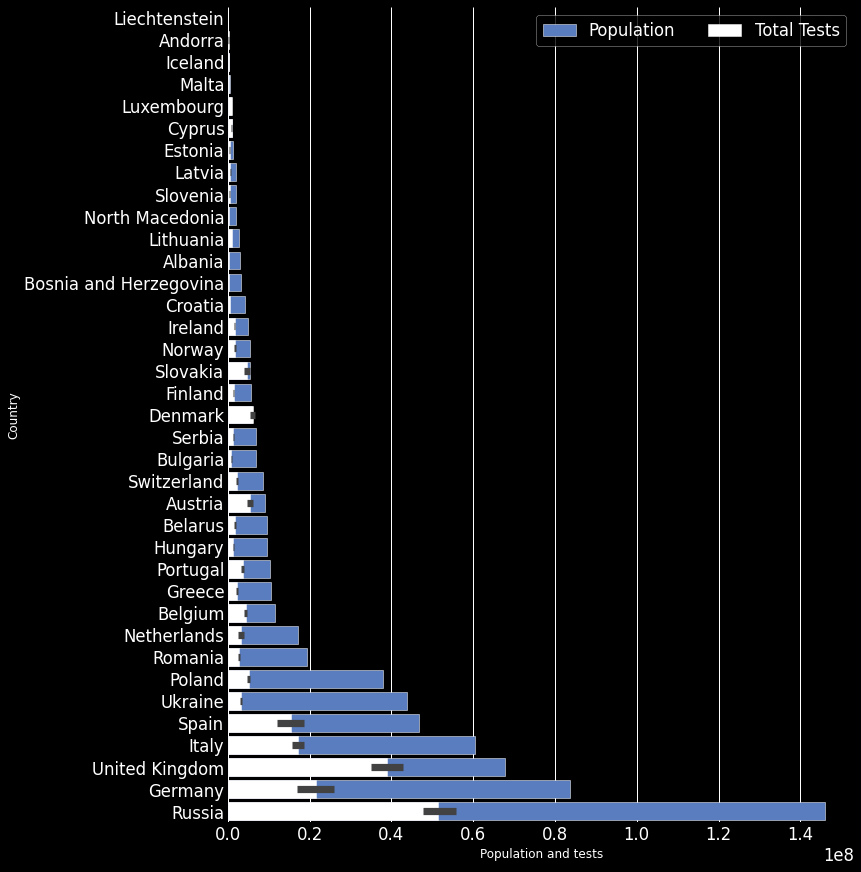

In [29]:
%matplotlib inline

df_europe = df_europe.sort_values('population', ascending=True)

# Remove NAN values in the dataframe
df_europe = df_europe[df_europe['population'].notna()]
df_europe = df_europe[df_europe['total_tests'].notna()]

with plt.style.context('dark_background'):

    f, ax = plt.subplots(figsize = (10,15))

    sb.barplot(x = 'population', y = 'location', data = df_europe,
                label = 'Population', color = 'b', edgecolor = 'w')

    sb.set_color_codes('muted')

    sb.barplot(x = 'total_tests', y = 'location', data = df_europe,
                label = 'Total Tests', color = 'white', edgecolor = 'w')

    ax.legend(ncol = 2, loc = 'upper right')
    ax.set(xlabel='Population and tests', ylabel='Country')
    sb.despine(left = True, bottom = True)
    plt.show()

As expected, countries with more population have tested more. What is interesting is that Germany tested roughly the same amount of people as Spain even though its population is double the amount of Spains. The same interesting phenomena is observed for Russia - having tested the same amount roughly as the United Kingdom but having more than twice their population.